<img src="python_logo.svg" />

 * High level programming language with an emphasis on easy to read and easy to write code
 * Includes an extensive standard library
 * We use version 3

 * History:
   * Exists since 1991
   * Python 3: December 2008
 * General purpose language
   * Used for web development, as a embedded scripting language, GUIs, etc.
   * Useful and popular language even outside of scientific computing

# Python for Scientists

 * Standard library does not provide support for scientific computing
 * But Python allows to import modules
 
 * The **SciPy** project provide the most well known set of libraries for the use in data science and scientific computing
   * NumPy
   * SciPy Lib
   * Matplotlib
   * Pandas

<img src="numpy_logo.png" width = 350px/>

 * Fast n-dimensional data array
 * Implements
  * Numerical linear algebra
  * Fourier transform
  * Random number capabilities

<img src="scipy_logo.png" width=400px/>

 * Numerical algorithms based on NumPy, e.g.
   * Integration
   * Interpolation
   * Optimisation
   * Image processing
   * and much more...

<img src="matplotlib_logo.svg" width=400px />
 * Powerful plotting library
 * 3D-plots possible (with matplotlib.mplot3D)

<img src="pandas_logo.png" width=500px />
 * Data analysis tools
 * Implements an (R-like) data frame object
   * Provides many database/spreadsheet like operations
  


# Introduction to Python for Scientific Computing

---

**This talk: ** focus on scientific computing capatibilities of Python.

Start with introduction to the mentioned libraries.

# Loading Modules in Python

 * Only core functionality available immediatly
  * Large standard library & libraries for scientific computing have to be loaded explicitly
 * The way of importing things influences the way functions of the imported module have to be called

In [3]:
# Import the scientific computing libraries
import numpy
numpy.array([1,2])

import numpy as np
np.array([1,2])

from numpy import zeros
zeros((2,1))

np.random.random((3,3))

array([[ 0.37556109,  0.05082125,  0.48747976],
       [ 0.31251569,  0.52029712,  0.38253015],
       [ 0.85919895,  0.96683455,  0.25135818]])

# Arrays in Python

 * Python lists
  * Support different types in one list
  * Many comfort features (e.g. list comprehensions)
  * Slow
  * Could be used to implement a matrix like structure
 * Use NumPy: Implementation of fast n-dimensional data arrays
  * Only elements of one data type

In [2]:
l = [1,2,3]

m = [[1,2],[3,4]]
m = [['a', 1.0], [True, (8+8j)]]
for a,b in m:
    print(type(a))
    print(type(b))
    
# List comprehensions: useful tool
[i*i for i in range(0, 5)]
    
# Python lists slow - use NumPy arrays
import numpy as np
a = np.array([[1,2], [3,4]], dtype='float64')
print(a)

<class 'str'>
<class 'float'>
<class 'bool'>
<class 'complex'>
[[ 1.  2.]
 [ 3.  4.]]


## Constructing NumPy Arrays

 * Always use NumPy arrays for data arrays
 * Functions implemented in NumPy are fast as they are mostrly written in compiled languages and not in Python
  * Use them!

In [4]:
# Manual way
a1 = np.array([[1,2], [3,4]])
a1
a1[0,1]

# Helper functions
a2 = np.zeros((5,5))
a2

a4 = np.full((5,5), 3.1415)
a4

a5 = np.random.random((3,3))
a5
#?np.random.random

# n-dimensional arrays possible
a5 = np.random.random((2,2,2))
a5.reshape((4,2))

array([[ 0.04480227,  0.06601044],
       [ 0.57136053,  0.04669032],
       [ 0.29790736,  0.57100582],
       [ 0.02299694,  0.15177795]])

## Indexing NumPy Arrays

 * a[start:stop:step]
  * Skipping one entry means from start/to end
 * Views don't copy the data!
   * **Don't view this as an inconvenience.** We will later see that this is really useful.

In [5]:
a6 = np.arange(1,5, 0.5)
a6
a6[0]
a6[0:4]
a6[0:4:2]
a6[0::2]
a6[1:]

a7 = np.arange(1, 10).reshape((3,3))
a7
a7[1:2,]

a7 < 5
a7[a7<5]

# Attention when working with subarrays:
a8 = a7[1:2,]
a8[0,0] = 20
a7
a8 = a7[1:2,].copy()
a8[0,0] = 30
a7

array([[ 1,  2,  3],
       [20,  5,  6],
       [ 7,  8,  9]])

# Matrix computations

 * NumPy & SciPy implement a number of important algorithms for numerical linear algebra
  * As before: using them is very fast because they are implemented in C/Fortran

In [6]:
# Matrix product
A = np.eye(3)
B = np.random.random((3,3))
A * B 
A @ B

np.linalg.solve(B, [1,2,3])
np.linalg.inv(B)
Q, R = np.linalg.qr(B)
R
# ?np.linalg
# More algorithms in SciPy
import scipy as sp
import scipy.linalg
?sp.linalg

## Vectorized Evaluation of Functions on Arrays

* In general: use NumPy/SciPy functions if available!
* For-loops should be avoided if possible
* A lot of functions are available for np.arrays, e.g trigonometric functions, min, max, median, average, ...

In [7]:
def f(vec):
    for val in vec:
        val *= 2

def g(vec):
    vec = 2*vec
    
vec = np.random.random((10000,1))
%timeit(f(vec))
%timeit(g(vec))

# Lot of functions are available for np.arrays
np.ones((2,2)) + np.ones((2,2))

np.max(np.random.random((20,2)))

24.5 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.55 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


0.99762679664366849

# Example: Image manipulation

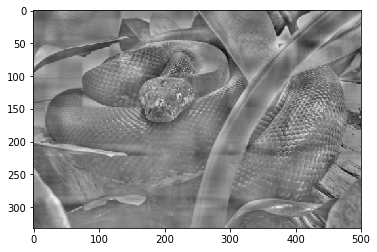

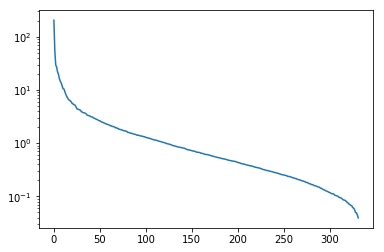

In [21]:
import matplotlib.pyplot as plt

img = np.loadtxt("python.pgm", comments="#").reshape((332, 500)) / 255
plt.imshow(img, cmap='gray')
# plt.show()

U,s,V = np.linalg.svd(img, full_matrices=False)

num_vals = -1
img_red = U[:,5:num_vals] @ np.diag(s[5:num_vals]) @ V[5:num_vals,:]
plt.imshow(img_red, cmap='gray')
plt.show()
plt.semilogy(range(0, len(s)), s)
plt.show()

## Summary
 * NumPy and SciPy provide convenient objects and functions for scientific computing
 * Resulting code is fast if NumPy functions are used for the time-critical operations
 

# General Programming in Python

 * We need loops and control structures to implement algorithms
 * Good thing: Python in itself is a nice programming language
   * Easy to read and write
   * Already used some of the structures, it is mostly obvious what they do
 * Python is object oriented, dynamic programming language
 * Beware: **indentation define blocks**
   * Saves you the ```{, }``` or the ```end```
   * Forces programmers to behave → is a good thing
   * Convention says: use **4 spaces for each indentation level**
   * Don't mix spaces and tabs


## If statements

In [8]:
a = 1
b = 2

if a != b:
    print(str(a) + " != " + str(b))
    
elif a == b:
    print(str(a) + " == " + str(b))
    
# Conditions can be chained with and, or
True and False

1 != 2


False

## Loops

 * for loops
    * can loop over everything iterable
    * i.e. arrays, tuples, ...
    * Your own data structers can be made iterable

In [9]:
# While
b = True
i = 1
while(b):
    i = i+1
    if i >= 4: b = False

i

# For
for i in range(0, 10):
    print(i, end=' ')
print(" ")

vec = [[1,2], [3,4]]
for i in vec:
    print(i[0] + i[1])
    
for i1, i2 in vec:
    print(i1 + i2)

0 1 2 3 4 5 6 7 8 9  
3
7
3
7


## Reminder:
Avoid loops if possible, use functions defined by NumPy/SciPy

## Functions

In [10]:
def f(x, print_val = True):
    x = x+1
    if print_val:
        print(x)

x = 1
f(x, False)
f(x, print_val=False)

# Return values
def g():
    return 5

a = g()
a

5

## Objects

 * Python is an object oriented programming language
 * Everything is an object and can be handled as such, e.g functions
 * Can define new classes

In [32]:
def f(x):
    def g():
        print(x)
    
    return g

f(2)()

2


## Exceptions

 * When something goes wrong, functions throw exceptions
 * Program terminates if exceptions are not catched

In [36]:
a = np.ones((3,3))

try:
    np.linalg.inv(a)
except:
    pass

try:
    np.linalg.inv(a)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


Now we know everything we need to use python for "real world" numerical problems. However, we still lack the possibility to present the gathered results.

Good thing there exists a plotting library as part of the SciPy project.

## Summary
We have seen
 * Necessary data structures and algorithms for numerical computations
 * Conditional statements and loops
 
We still need a way to present the gathered information.

# Plotting with Matplotlib
Matplotlib supports two interfaces
 * High-level (mostly Matlab-like) functions
 * Object oriented interface

 * For more complex plots: use the object oriented interface
 * Here: Only a small example, lots of examples and tutorials online


## Matplotlib example

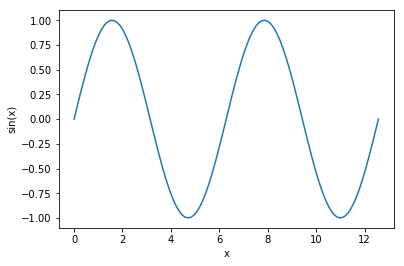

In [28]:
import matplotlib.pyplot as plt

x_values = np.linspace(0, 4*np.pi, 100)
y_values = np.sin(x_values)

plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("sin(x)")

plt.show()

# Example: Mandelbrot set
The mandelbrot set $\mathcal{M} \subset \mathbb{C}$ consists of the values $c \in \mathbb{C}$ for which
the iteration

$$ z_{i+1} = z_{i}^2 + c, \;\; z_0 = 0$$

remains bounded in absolute values.

In [184]:
def mandelbrot_iter(c, number_of_iterations):
    z = np.zeros(c.shape, dtype='complex64')
    for i in range(0, number_of_iterations):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        z[notdone] = z[notdone]**2 + c[notdone]
    
    return z

# Create linspace
x = np.linspace(-1.5, 0.5, 400)
y = np.linspace(-1, 1, 400) * 1j
xy = np.add.outer(y, x)

res = mandelbrot_iter(xy, 2000)
res = np.abs(res)
res = 1 - (res < 2).astype('float')

# Trick with mask from 
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en

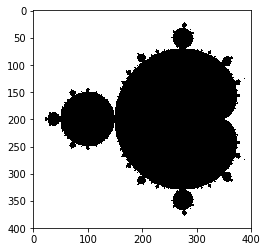

In [185]:
plt.imshow(res)
plt.show()

# Exercise: Julia sets
Given a function

$$ f_c(z) = z^2 + c $$

we define the Julia set $\mathcal{J}_c$ by

$$ \mathcal{J}_c := \left\{ z \in \mathbb{C} : |f^{(n)}_c(z) | \leq 2, n = 1, 2, \dots \right\}.$$

---
Write a program that plots an approximation of the julia set. Try for example

$$ c = 0.6i. $$



In [188]:
import cmath
def julia_iter(z, c, number_of_iterations):
    for i in range(0, number_of_iterations):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        z[notdone] = z[notdone]**2 + c
    
    return z

# Create linspace
x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500) * 1j
xy = np.add.outer(y, x)

res = julia_iter(xy, 0.63j, 300)
res = np.abs(res)
res = 1 - (res < 2).astype('float')

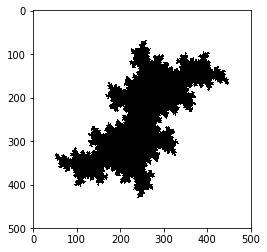

In [189]:
plt.imshow(res)
plt.show()

# Tools for Development & Presentation

 * Spyder
    * R-Studio like environment

 * PyCharm
    * Full featured IDE, suitable for large projects
    * Open-source & commercial versions available
    * Commercial features mainly for web development

 * Jupyter Notebook
    * Data exploration & presentation
    * Used for this presentation

# Resources

**Python in general:**
 * Many tutorials, books online.
 * Watch out for resources still teaching Python 2
 
**Scientific computing stack:**
 * Simple introduction: http://akuederle.com/scientific-python-now-1
 * Book: Python Data Science Handbook (available online https://jakevdp.github.io/PythonDataScienceHandbook/)